# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

**Problem Statement** :
FoodHub, a food aggregator company, provides an online platform for users to order food from multiple restaurants using a single app. The platform handles the entire process from order placement to delivery. FoodHub collects data related to customer orders, including details about the restaurants, types of cuisine, delivery times, customer ratings, and other relevant factors.

The company is interested in analyzing this data to gain insights into customer demand patterns, restaurant performance, and service efficiency. This analysis will help FoodHub enhance the customer experience and optimize its operations by making data-driven decisions.

**Objective** :
The objective of the project is to analyze the data from FoodHub’s orders to:

Understand customer demand across various restaurants and cuisine types.
Analyze factors that affect order delivery times and customer ratings.
Identify areas where FoodHub can improve the customer experience and operational efficiency.


### Data Dictionary

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary:

- **order_id**: Unique ID of the order
- **customer_id**: ID of the customer who ordered the food
- **restaurant_name**: Name of the restaurant
- **cuisine_type**: Cuisine ordered by the customer
- **cost_of_the_order**: Price paid per order
- **day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- **rating**: Rating given by the customer out of 5
- **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries

In [ ]:
# to import necessary libraries for the project
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# run the following lines for Google Colab
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# code to read the data
data=pd.read_csv("/content/drive/My Drive/python intro/FoodHub-Project/foodhub_order.csv")
df=data.copy() #createing a copy of the original DataFrame data  without affecting the original dataset.

In [ ]:
# to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


**Observations:**
* The DataFrame comprises 9 columns, as detailed in the Data Dictionary. Each row represents a distinct order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print(df.shape)
rows, columns = df.shape

# Print the number of rows and columns using string concatenation
# print("There are " + str(rows) + " rows and " + str(columns) + " columns in the dataset.")

(1898, 9)


#### **Observations:**
The DataFrame contains 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# basic information about entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**
* There are a total of 1898 non-null observations in each of the columns.
* There are 5 numerical columns in the data (`order_id`, `customer_id`, `cost_of_the_order`, `food_preparation_time`, `delivery_time`).
  
* There are 4 object type columns (`restaurant_name`, `cuisine_type`, `day_of_the_week`, `rating`).





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Print the missing values count for each column
print(missing_values)




,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Observations:**
* There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Checking the statistical summary of the data,"include='all'" will bring in also categorical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


###** Observations:**
1.  There are a total of **1898 orders** in the dataset.
2.  The minimum time it takes for food to be prepared is **20 minutes**.
3. The average time for food preparation is approximately **27.37 minutes**.
4.: The maximum time recorded for food preparation is **35 minutes**.
5. The standard deviation for food preparation time is **4.63 minutes**, indicating a moderate variability in preparation times across different orders.
6.The delivery times for orders vary between 15 and 33 minutes. On average, orders are delivered in about 24 minutes, with a standard deviation of 5 minutes. This suggests that the delivery times are consistent and do not fluctuate significantly
7.American Cuisine is the most popular cuisine and Shake Shack is the restaurant with high number of orders.
Most orders are made during the weekend and 736 orders(around 36% of orders) are not rated

### Summary:
The data indicates that food preparation times for orders range from **20 to 35 minutes**, with an average of approximately **27.37 minutes**. This range suggests that while most orders are prepared in a relatively short time, there are also instances of longer preparation times, which may be important for customer satisfaction and delivery efficiency.






### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#the portion of orders that are not rated by counting all unique ratings
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### **Observations:**
There are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on Customer ID**

In [ ]:
 #Identify Unique Customers
df['customer_id'].nunique()

1200

* There are 1,200 unique customer IDs.
* This indicates that some customers have placed multiple orders, suggesting a level of repeat business or customer loyalty within the dataset.
The presence of repeated customer IDs could provide insights into customer behavior, such as frequency of orders and preferences for certain restaurants or cuisines.

**Observations on Restaurants**

In [ ]:
#Identify Unique restaurants
df['restaurant_name'].nunique()

178

* There are 178 unique restaurents in the dataset.
* Lets calculate number of orders served by each restaurent.

In [ ]:
# Finding top restaurants
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


* The restaurant that has received maximum number of orders is Shake Shack

**Observations on Cost of the order**

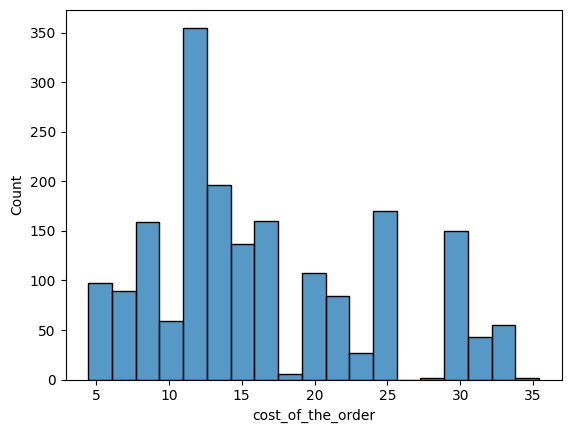

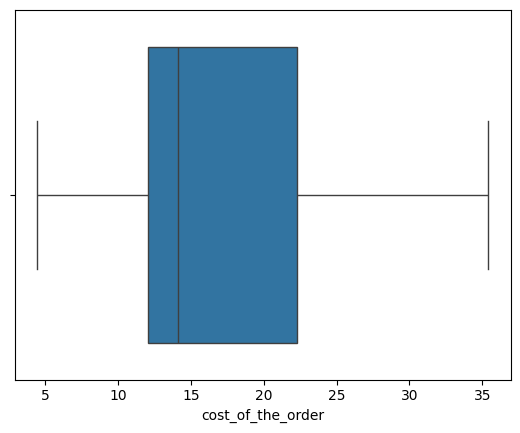

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

* The distribution of  cost of the order is skewed towards the right indicating that the average cost of the order is greater than the median cost .
* There are no outliers
* The cost of the orders varied from 5 to 35 and  large number of people prefered to order food that costs around 10-12 dollars

**Observations on food preperation time**

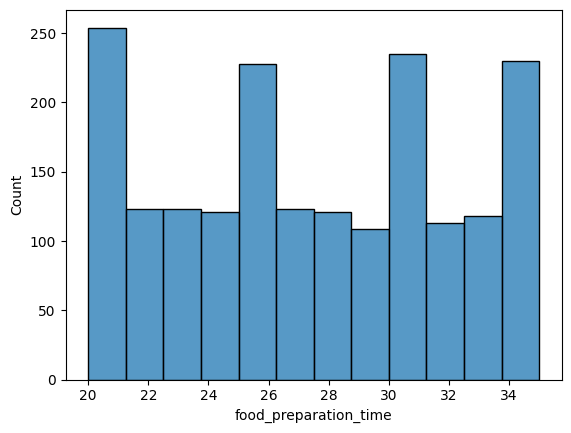

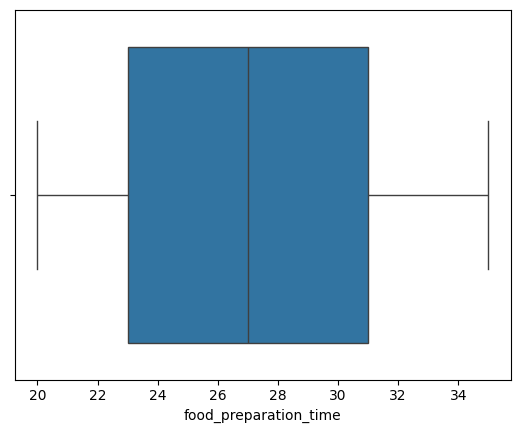

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

* The distribution is symmetrical(normal).
* The food preparation time is pretty evenly distributed between 20 and 35 minutes.
* There are no outliers

**Observations on delivery time**

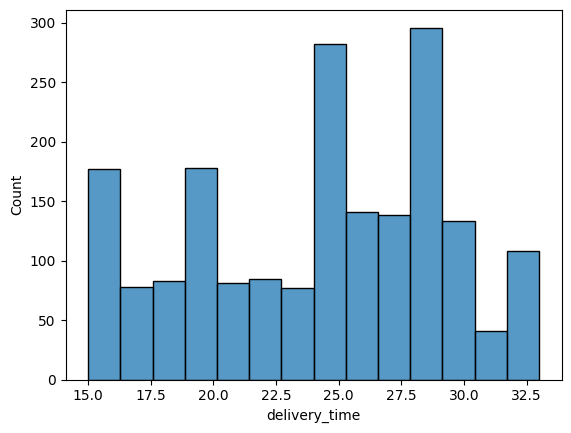

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


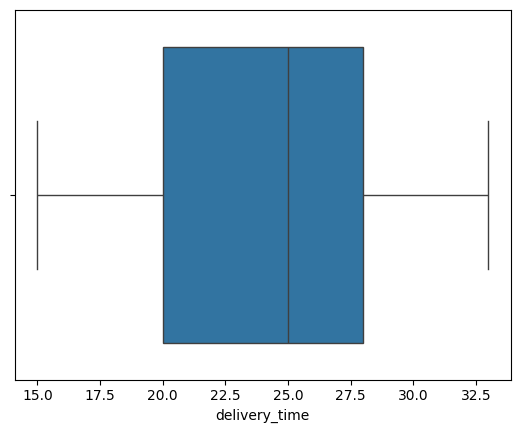

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

* The distribution is skewed towars left
* Relatively more orders are delivered within a time frame of 24 to 30 minutes.
* There are no outliers observed

**Observations on cuisine type**

In [ ]:
 #Identifying the unique types of cuisines in the dataset
df['cuisine_type'].nunique()

14

* There are 14 types of cuisines.

<ipython-input-57-c736535b4e24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="cuisine_type",palette='pastel')


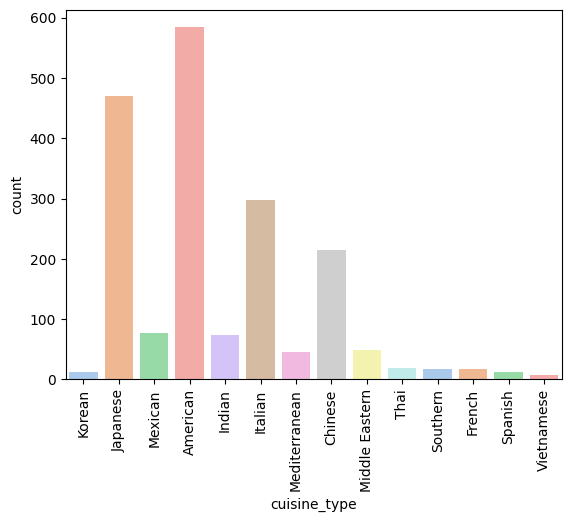

In [ ]:
# Displaying barplot
sns.countplot(data=df,x="cuisine_type",palette='pastel')
plt.xticks(rotation=90)
plt.show()

* American,Japanese,Italian,Chinese are the most ordered cuisine respectivley.
* Mexican,Indian,Mediterranean,Middle Eastern have relatively moderate number of orders
* Korean,Thai,Southern,French,Spanish,Vietnamese have least number of orders


In [ ]:
#lets find the most ordered and least ordered
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


* Most ordered is american and least ordered is vietnamese

**Observations on day of the week**





In [ ]:
df['day_of_the_week'].value_counts() #counting the orders based on day of the week

,count
day_of_the_week,
Weekend,1351
Weekday,547


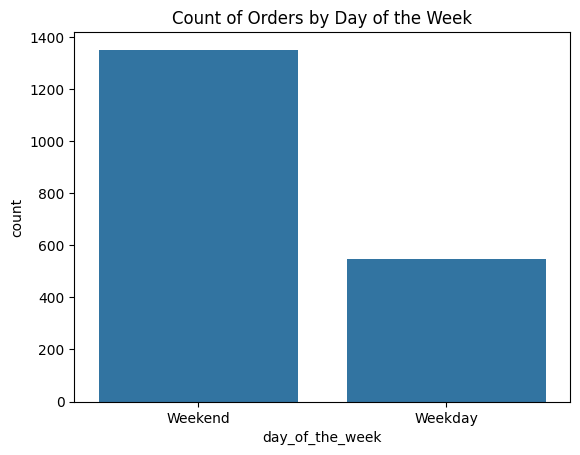

In [ ]:
sns.countplot(data=df,x="day_of_the_week")
plt.show()

* The 'day_of_the_week' column contains two distinct categories: Weekday and Weekend.
* The data indicates that there are more orders placed during the weekends compared to weekdays.





In [ ]:
# checking the unique values in the rating column
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


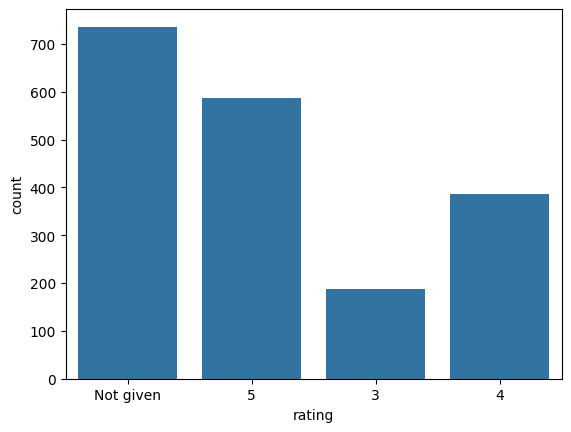

In [ ]:
sns.countplot(data=df,x="rating")

plt.show()

* The distribution of the 'rating' variable indicates that the most commonly encountered category is 'Not Given,' closely followed by a rating of 5.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#the top 5 restaurants in terms of the number of orders received
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### **Observations:**
The top 5 restaurants in terms of the number of orders received are **Shake Shack**, **The Meatball Shop**, **Blue Ribbon Sushi**, **Blue Ribbon Fried Chicken**, and **Parm**.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:

# Filter the data for weekends and Finding the most popular cuisine on weekends
df[df["day_of_the_week"]=='Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### **Observations:**
The most popular cuisine on weekends is '**American**' with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# The percentage of the orders cost more than 20 dollars
(df["cost_of_the_order"]>20).value_counts(normalize="True")*100
# Another way is to use the .mean() -> treats True as 1 and False as 0, so the mean gives the proportion of True values
round((df['cost_of_the_order'] > 20).mean()*100,1)

29.2

#### **Observations:**
The percentage of the orders that cost more than 20 dollars is **29.2**%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# the mean order delivery time
df["delivery_time"].mean()

24.161749209694417

#### **Observations:**
The mean order delivery time is **24.161**.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Count the number of orders per customer and get the top 3
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### **Observations:**

The ids of top 3 Most Frequent Customers and Their Order Counts:

| **customer_id** | **count** |
|------------------|-----------|
| 52832            | 13        |
| 47440            | 10        |
| 83287            | 9         |



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Correlation among variables**

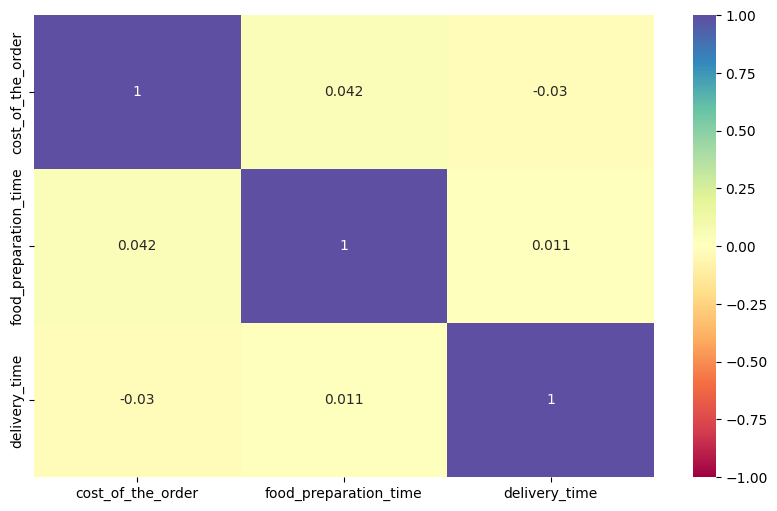

In [ ]:
# Write the code here
data =['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[data].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

**Observations:**

*
The correlations are quite weak, indicating that the variables have little to no relationship with each other and generally behave independently.

**Comparing Cuisine type with Cost of the order**

<ipython-input-11-24043a73bc46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type',y='cost_of_the_order', data=df,palette='BuGn')


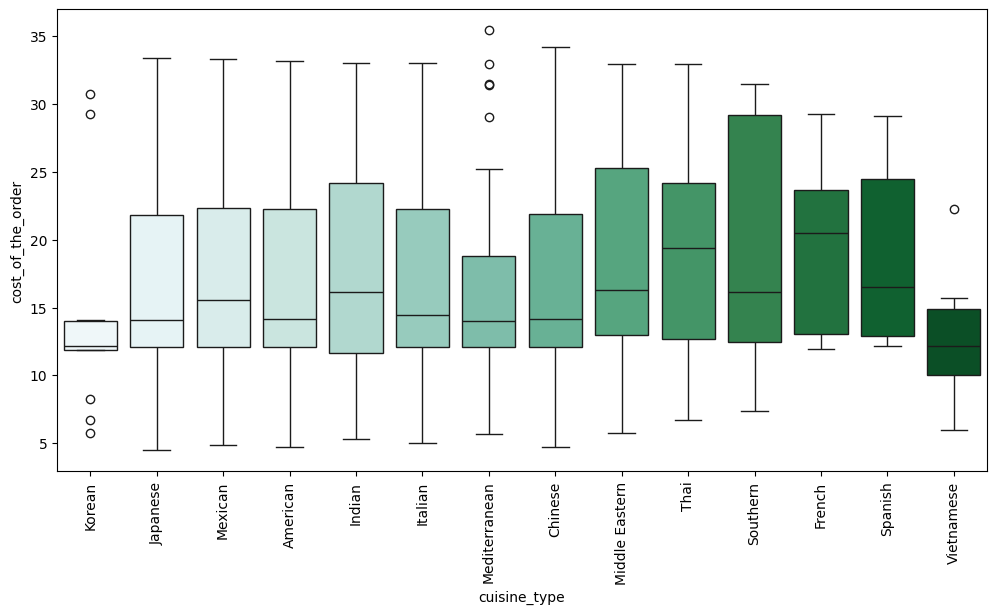

In [ ]:
#Relationship Between Order Cost and Cuisine Type
# Boxplot of cuisine type vs cost of the order
plt.figure(figsize=(12,6))
sns.boxplot(x='cuisine_type',y='cost_of_the_order', data=df,palette='BuGn')
plt.xticks(rotation=90)
plt.show()

**Observations:**

* Korean and Vietnamese cuisines show lower median costs compared to other cuisines,confirming that these cuisines are less expensive.
* French, Spanish, and Southern cuisines have higher median costs, indicating that these cuisines tend to be more expensive.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* The boxplots for American, Italian, Chinese, and Japanese cuisines show similar patterns, suggesting that the quartile costs for these cuisines are closely aligned.

**Comparing Cuisine type with Food preperation time**

<ipython-input-20-7ec5ae9b0fce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type",  y = "food_preparation_time", data=df,palette='BuGn')


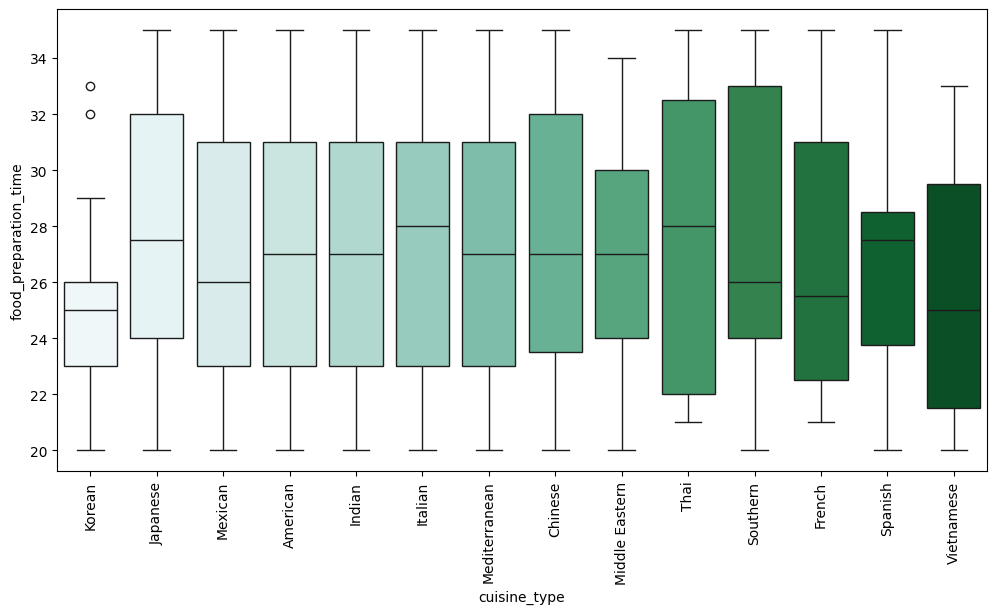

In [ ]:
# Relationship between food preparation time and cuisine type
# Boxplot of cuisine type vs cost of the order
plt.figure(figsize=(12, 6))
sns.boxplot(x = "cuisine_type",  y = "food_preparation_time", data=df,palette='BuGn')
plt.xticks(rotation=90)
plt.show()

**Observations:**

* Food preparation time is quite consistent across most cuisines, with the majority having a similar range between 22 and 32 minutes.

* Korean cuisine shows the shortest preparation time overall. This suggests that Korean dishes are prepared more quickly compared to other cuisines.

* Korean cuisine has outliers. This indicates occasional variability in preparation time for this cuisine.

* The median food preparation time for all cuisines lies between 24 and 30 minutes, showing a common range for most cuisine types despite slight variations.



**Comparing Day of the Week with Delivery time**

<ipython-input-6-86ba8e808672>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df,palette='BuGn')


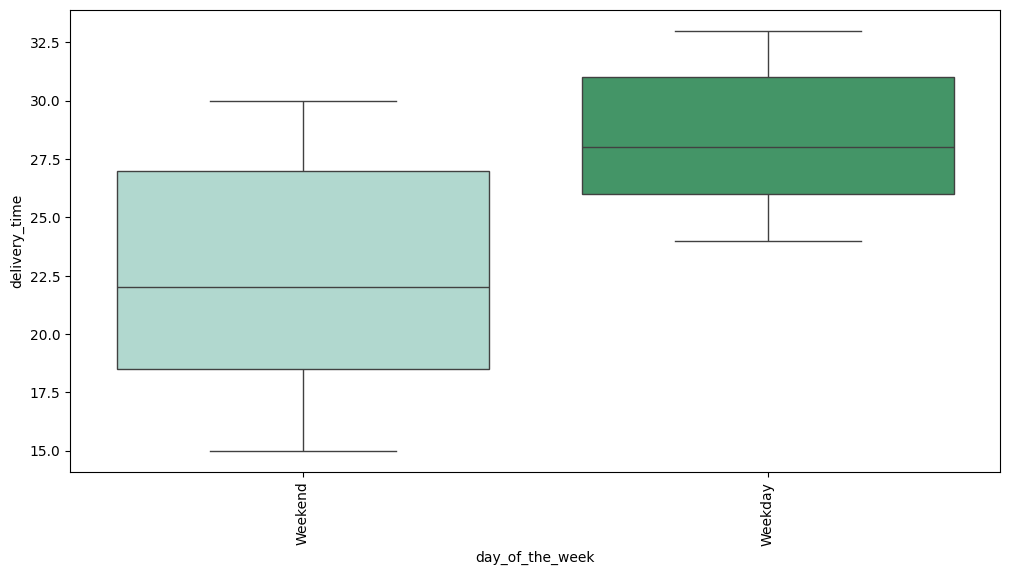

In [ ]:
# Relationship between day of the week and delivery time
# Boxplot of Day of the Week vs Delivery time
plt.figure(figsize=(12, 6))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df,palette='BuGn')
plt.xticks(rotation=90)
plt.show()

**Observations:**


* The delivery time for all orders is shorter on weekends compared to weekdays. This could be attributed to the decrease in traffic during the weekends.

**Comparing rating with cost of the order**

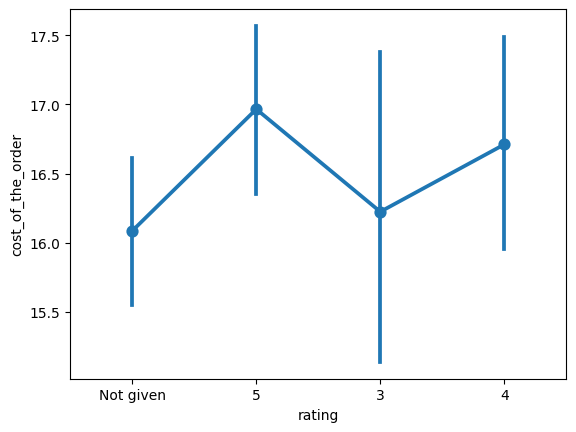

In [ ]:
# Relationship between rating and cost of the order
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

**Observations:**

* It is observed that high-cost orders have been rated well and low-cost orders have not been rated.

**Comparing Delivery time with rating**

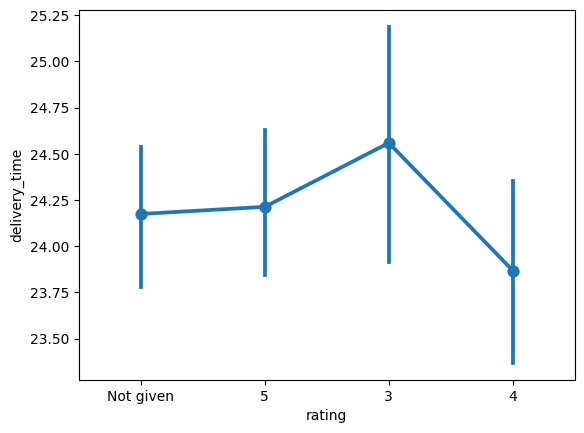

In [ ]:
# Relationship between rating and delivery time
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Observations:**

* The low ratings for the orders might be influenced by the delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter out restaurants with 'Not given' ratings
valid_ratings = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
valid_ratings['rating'] = valid_ratings['rating'].astype('int')
rating_summary = valid_ratings.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),  # Count of ratings
    average_rating=('rating', 'mean')   # Average rating
).reset_index()

# Step 2: Filter for promotional offers
promotional_restaurants = rating_summary[
    (rating_summary['rating_count'] > 50) &
    (rating_summary['average_rating'] > 4)
]

# Step 3: Display the results
print(promotional_restaurants)

               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64           4.328
17           Blue Ribbon Sushi            73           4.219
117                Shake Shack           133           4.278
132          The Meatball Shop            84           4.512


#### Observations:


* The restaurants fulfilling the criteria to get the promotional offer are **The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi**. All these establishments have more than 50 ratings and an average rating above 4, indicating strong customer satisfaction and popularity.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Define a function to calculate revenue based on cost
def calculateRevenue(row):
    if row['cost_of_the_order']>20:
      return row['cost_of_the_order']*0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0
#Applying the function to the DataFrame
df['revenue']= df.apply(calculateRevenue, axis=1)
total_revenue = df['revenue'].sum()
print(round(total_revenue,1))

6166.3


#### Observations:
If the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars, Then  the net revenue generated by the company across all orders will be **6166.3** dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Define a function to calculate total time
def totalTime(row):
    return row['food_preparation_time'] + row['delivery_time']

# Apply the function to create a new column
df['total_time_required_to_deliver_the_food'] = df.apply(totalTime, axis=1)

# Calculate the count of orders that take more than 60 minutes
orders_more_than_60 = (df['total_time_required_to_deliver_the_food'] > 60).sum()

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders taking more than 60 minutes
percentage_more_than_60 = (orders_more_than_60 / total_orders) * 100
print(round(percentage_more_than_60,2))

10.54


#### Observations:
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is **10.54**%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery_time = round(df.groupby('day_of_the_week')['delivery_time'].mean())

# Display the mean delivery time for weekdays and weekends
print(mean_delivery_time)

day_of_the_week
Weekday   28.000
Weekend   22.000
Name: delivery_time, dtype: float64


#### Observations:


* The mean delivery time is higher on weekdays (28 minutes) compared to weekends (22 minutes).
* This indicates that orders tend to take longer to be delivered during the weekdays in your dataset.
* This increase in delivery time may be due to factors such as heightened traffic congestion on weekdays, as more people are commuting.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most frequent cuisine type is American, followed by Japanese and Italian in FoodHub customers, accounting for approximately 80% of all orders.
* Shake Shack stands out as the most popular restaurant, receiving the highest number of orders as well as the most rated restaurent.
* Weekends have almost double the number of orders compared to weekdays.
* Delivery time on weekends is lower compared to weekdays.
* Approximately 39% of orders remain unrated, indicating a potential area for improvement.
* It appears that high-cost orders tend to have higher ratings, while low-cost orders have not been rated much.

### Recommendations:

**Strategic Partnerships:** FoodHub should actively seek partnerships with restaurants specializing in American, Japanese, Italian, and Chinese cuisines to cater to the preferences of its customer base.

**Targeted Promotions:** Offer promotional deals and incentives to top-rated restaurants like Shake Shack, rewarding their popularity and encouraging repeat business.

**Weekend Staffing Optimization:** To meet the increased demand during weekends, FoodHub should consider hiring additional delivery personnel to ensure timely order delivery and enhance customer satisfaction.

**Customer Feedback Incentives:** Implement strategies to encourage more customers to leave ratings. This could include providing discounts, loyalty points, or exclusive offers to those who rate their orders. Redesigning the rating interface to make it more engaging and user-friendly could also increase participation.

**Delivery Time Optimization:** Focus on reducing the number of orders that take over 60 minutes to deliver. This could involve optimizing delivery routes, improving communication between restaurants and delivery personnel, or implementing incentives for timely deliveries.

**By implementing these recommendations, FoodHub can enhance customer satisfaction, increase revenue, and solidify its position as a leading food delivery platform.**

In [ ]:
!jupyter nbconvert --to html FoodHub_project.ipynb

[NbConvertApp] Converting notebook FoodHub_project.ipynb to html
[NbConvertApp] Writing 1094544 bytes to FoodHub_project.html
